<a href="https://colab.research.google.com/github/JS-DS-coder/CienciaDeDatos2021/blob/master/Hojadetrabajo1IR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow    
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

# Problema 1

Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la funcion debe devolver una imagen la cual tenga activos los canales de color segun los siguientes puntos:

- Si el parametro color vale 1, la imagen debe mostrar activos unicamente el color azul.
-Si el par ametro color vale 2, la imagen debe mostrar activos unicamente el color verde.
-Si el par ametro color vale 3, la imagen debe mostrar activos unicamente el color rojo.
-Si el par ametro color vale 10, la imagen debe mostrar activos unicamente los colores rojo y verde.
-Si el par ametro color vale 20, la imagen debe mostrar activos unicamente los colores verde y azul.
-Si el parametro color vale 30, la imagen debe mostrar activos unicamente los colores azul y rojo.

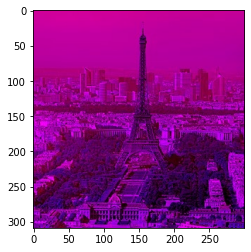

In [15]:
def ProcesarImagen(img,alto,ancho,parametro):
  imgSalida = np.zeros((alto,ancho,3))
  for i in range(0,alto):
    for j in range (0,ancho):
      pixel = img[i,j]
      blue = pixel[2]
      green = pixel[1]
      red = pixel [0]
      if parametro == 1:
        imgSalida[i,j] = [red,0,0]
      elif parametro == 2:
        imgSalida[i,j] = [0,green,0]
      elif parametro == 3:
        imgSalida[i,j] = [0,0,blue]
      elif parametro == 10:
        imgSalida[i,j] = [0,green,blue]
      elif parametro == 20:
        imgSalida[i,j] = [red,green,0]
      elif parametro == 30:
        imgSalida[i,j] = [blue,0,red]

  cv.imwrite("Imagen_salida.jpg",imgSalida)
  imgTemp = cv.imread("Imagen_salida.jpg")
  imgTemp = cv.cvtColor(imgTemp,cv.COLOR_BGR2RGB)
  return imgTemp            

def ModificarImagen(imgname,parametro):
  img = cv.imread(imgname)  
  plt.imshow(img)
  ## Dimensiones de la imagen
  alto = img.shape[0]
  ancho = img.shape[1]
  imgsal = ProcesarImagen(img,alto,ancho,parametro)
  plt.imshow(imgsal)

ModificarImagen("paris.jpg",30)




# Problema 2


En el .zip del laboratorio se le compartio  un conjunto de imagenes en escala de grises, estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una funcion que dadas las 3 im ́agenes se construya la imagen original a color.

(540, 810, 3)


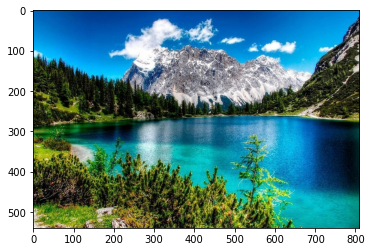

In [25]:
  imgAzul = cv.imread("imagen1_salida_gray_azul.jpg")  
  imgRojo = cv.imread("imagen1_salida_gray_rojo.jpg")  
  imgVerde = cv.imread("imagen1_salida_gray_verde.jpg")  
  alto = imgAzul.shape[0]
  ancho = imgAzul.shape[1]
  imgSalida = np.zeros((alto,ancho,3))
  print(imgSalida.shape)
  for i in range(0,alto):
    for j in range (0,ancho):
     pixelb = imgAzul[i,j]
     pixelr = imgRojo[i,j]
     pixelv = imgVerde[i,j]
     blue = pixelb[0]
     green = pixelv[1]
     red   = pixelr[2]
     imgSalida[i,j] = [blue,green,red]
  cv.imwrite("Imagen_salida.jpg",imgSalida)
  imgTemp = cv.imread("Imagen_salida.jpg")
  imgTemp = cv.cvtColor(imgTemp,cv.COLOR_BGR2RGB)
  plt.imshow(imgTemp)



# Problema 3

Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su funci ́on debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2.

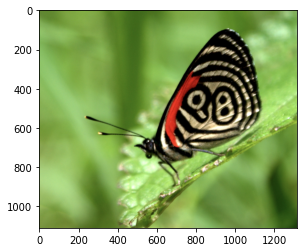

In [32]:
def write_and_show (strImg,arrImg):
  cv.imwrite(strImg,arrImg)
  imgTemp = cv.imread(strImg)
  imgTemp = cv.cvtColor(imgTemp,cv.COLOR_BGR2RGB)
  plt.imshow(imgTemp)

def generaGrises(alto,ancho,img):
  gray_green = np.zeros((alto,ancho,1))
  gray_blue = np.zeros((alto,ancho,1))
  gray_red = np.zeros((alto,ancho,1))
  for i in range(0,alto):
   for j in range (0,ancho):
    pixel = img[i,j]
    gray_blue[i,j] = pixel[2]
    gray_green[i,j] = pixel[1]
    gray_red[i,j] = pixel [0]
  return gray_red,gray_blue,gray_green

imgoriginal = cv.imread("98.jpg") 
imgoriginal = cv.cvtColor(imgoriginal,cv.COLOR_BGR2RGB)
plt.imshow(imgoriginal)
alto = imgoriginal.shape[0]
ancho = imgoriginal.shape[1]
gred,gblue,ggreen = generaGrises(alto,ancho,imgoriginal)


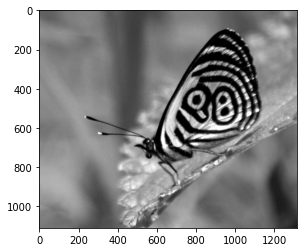

In [33]:
write_and_show("98grayred.jpg",gred)



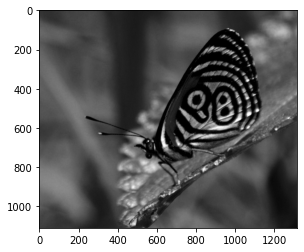

In [34]:
write_and_show("98grayblue.jpg",gblue)

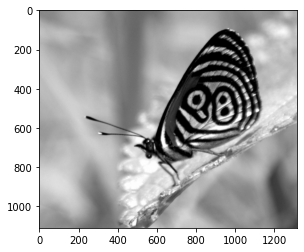

In [35]:
write_and_show("98graygreen.jpg",ggreen)

# Problema 4

Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una lınea vertical la cual muestre el valor de la media de la distribucion.

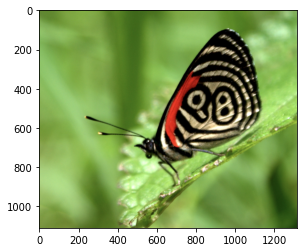

In [39]:
def generaGrises(alto,ancho,img):
  gray_green = np.zeros((alto,ancho,1))
  gray_blue = np.zeros((alto,ancho,1))
  gray_red = np.zeros((alto,ancho,1))
  gray_aritmetica = np.zeros((alto,ancho,1))
  gray_ponderada = np.zeros((alto,ancho,1))
  for i in range(0,alto):
   for j in range (0,ancho):
    pixel = img[i,j]
    gray_blue[i,j] = pixel[2]
    gray_green[i,j] = pixel[1]
    gray_red[i,j] = pixel [0]
    gray_aritmetica[i,j] = np.mean(pixel)
    gray_ponderada[i,j] = int(0.299*pixel[2] + 0.587*pixel[1] + 0.114*pixel[0])
  return gray_red,gray_blue,gray_green,gray_aritmetica,gray_ponderada


imgoriginal = cv.imread("98.jpg") 
imgoriginal = cv.cvtColor(imgoriginal,cv.COLOR_BGR2RGB)
plt.imshow(imgoriginal)

gred,gblue,ggreen,garitmetica,gponderada = generaGrises(alto,ancho,imgoriginal)

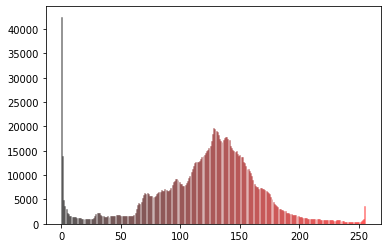

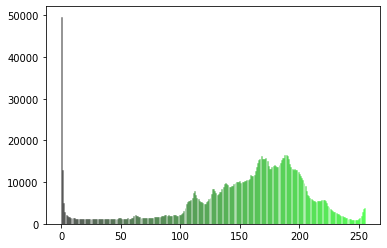

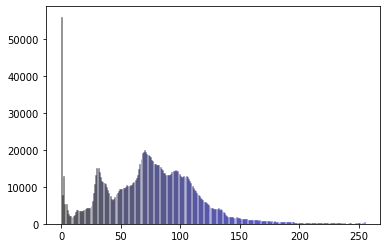

In [46]:
def getRed(redVal):

    return '#%02x%02x%02x' % (redVal, 0, 0)

 

def getGreen(greenVal):

    return '#%02x%02x%02x' % (0, greenVal, 0)

   

def getBlue(blueVal):

    return '#%02x%02x%02x' % (0, 0, blueVal)


image = Image.open("./98.jpg")
image.putpixel((0,1), (1,1,5))
image.putpixel((0,2), (2,1,5))

histogram = image.histogram()


#Rojo

l1 = histogram[0:256]

 

#Azul

l2 = histogram[256:512]

 

# Verde

l3 = histogram[512:768]

 

plt.figure(0)
#histograma Rojo
for i in range(0, 256):

    plt.bar(i, l1[i], color = getRed(i), edgecolor=getRed(i), alpha=0.3)

# Histograma verde

plt.figure(1)

for i in range(0, 256):

    plt.bar(i, l2[i], color = getGreen(i), edgecolor=getGreen(i),alpha=0.3)

 

 

# Histograma Azul

plt.figure(2)

for i in range(0, 256):

    plt.bar(i, l3[i], color = getBlue(i), edgecolor=getBlue(i),alpha=0.3)

 

plt.show()




# Problema 5

Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una funcion que dada una imagen, realice una escala de grises ponderada (notar que no existe una solucion unica).

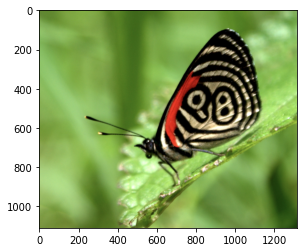

In [47]:
def generaGrises(alto,ancho,img):
  gray_green = np.zeros((alto,ancho,1))
  gray_blue = np.zeros((alto,ancho,1))
  gray_red = np.zeros((alto,ancho,1))
  gray_aritmetica = np.zeros((alto,ancho,1))
  gray_ponderada = np.zeros((alto,ancho,1))
  for i in range(0,alto):
   for j in range (0,ancho):
    pixel = img[i,j]
    gray_blue[i,j] = pixel[2]
    gray_green[i,j] = pixel[1]
    gray_red[i,j] = pixel [0]
    gray_aritmetica[i,j] = np.mean(pixel)
    gray_ponderada[i,j] = int(0.299*pixel[2] + 0.587*pixel[1] + 0.114*pixel[0])
  return gray_red,gray_blue,gray_green,gray_aritmetica,gray_ponderada


imgoriginal = cv.imread("98.jpg") 
imgoriginal = cv.cvtColor(imgoriginal,cv.COLOR_BGR2RGB)
plt.imshow(imgoriginal)

gred,gblue,ggreen,garitmetica,gponderada = generaGrises(alto,ancho,imgoriginal)

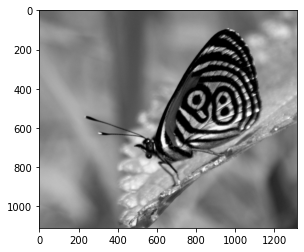

In [51]:
write_and_show("98grisponderada.jpg",gponderada)

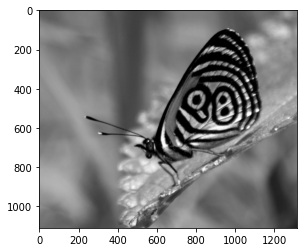

In [52]:
write_and_show("98grisaritmetica.jpg",garitmetica)

# Problema 6

Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho espacio, para entregar este ejercicio puede hacer con un archivo PDF.